<h1>Temperature Projections</h1>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
mp = 1.672622e-24 # mass of hydrogren atom, in grams
kb = 1.380658e-16 # boltzmann constant in ergs/K

In [4]:
f = h5py.File('200_512_f32.h5', 'r') # open the hdf5 file for reading
head = f.attrs # read the header attributes into a structure, called head

In [5]:
head.keys()

<KeysViewHDF5 ['density_unit', 'dims', 'dt', 'dx', 'energy_unit', 'gamma', 'length_unit', 'mass_unit', 'n_fields', 'n_step', 't', 'time_unit', 'velocity_unit']>

In [6]:
f.keys()

<KeysViewHDF5 ['Energy', 'GasEnergy', 'density', 'momentum_x', 'momentum_y', 'momentum_z']>

In [7]:
gamma = head['gamma'] # ratio of specific heats
t  = head['t'] # time of this snapshot, in kyr
nx = head['dims'][0] # number of cells in the x direction
ny = head['dims'][1] # number of cells in the y direction
nz = head['dims'][2] # number of cells in the z direction
dx = head['dx'][0] # width of cell in x direction
dy = head['dx'][1] # width of cell in y direction
dz = head['dx'][2] # width of cell in z direction
l_c = head['length_unit']
t_c = head['time_unit']
m_c = head['mass_unit']
d_c = head['density_unit']                 
v_c = head['velocity_unit']
e_c = head['energy_unit']
p_c = e_c # pressure units are the same as energy density units, density*velocity^2/length^3

In [8]:
d  = f['density'][:]
GE = f['GasEnergy'][:]

In [9]:
f.close()

In [10]:
mu = 1.0 # mean molecular weight (mu) of 1

d = d*d_c # to convert from code units to cgs, multiply by the code unit for that variable
n = d/(mu*mp) # number density, particles per cm^3

In [11]:
T = GE*(gamma - 1.0)*p_c / (n*kb)

In [12]:
print(np.min(T), np.max(T))

250.40210778793897 32938641.21378435


In [13]:
T_x = np.sum(T, axis=0)*dx*l_c 
T_y = np.sum(T, axis=1)*dx*l_c
T_z = np.sum(T, axis=2)*dx*l_c

In [14]:
print(np.min(T_x), np.max(T_x))

1.93262862919615e+27 2.9487917403644846e+27


In [15]:
log_T_x = np.log10(T_x)
log_T_y = np.log10(T_y)
log_T_z = np.log10(T_z)
print("N range    = %5.2f %5.2f" % (np.min(log_T_x), np.max(log_T_x)))
print("N range    = %5.2f %5.2f" % (np.min(log_T_y), np.max(log_T_y)))
print("N range    = %5.2f %5.2f" % (np.min(log_T_z), np.max(log_T_z)))

N range    = 27.29 27.47
N range    = 26.64 26.90
N range    = 26.64 26.88


In [16]:
T_min = 26.64
T_max = 27.47

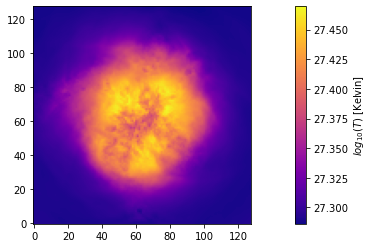

In [20]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(log_T_x.T, origin='lower', cmap='plasma')
cb = plt.colorbar(image, label='$log_{10}(T)$ [Kelvin]')

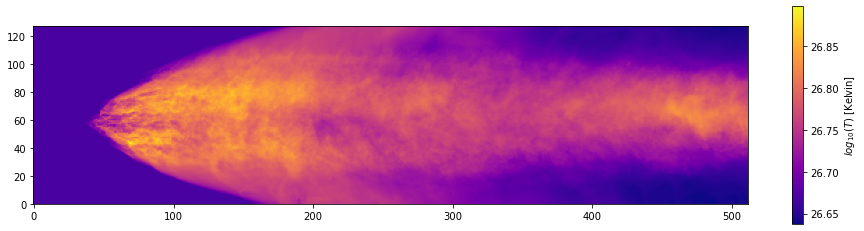

In [21]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(log_T_y.T, origin='lower', cmap='plasma')
cb = plt.colorbar(image, label='$log_{10}(T)$ [Kelvin]')

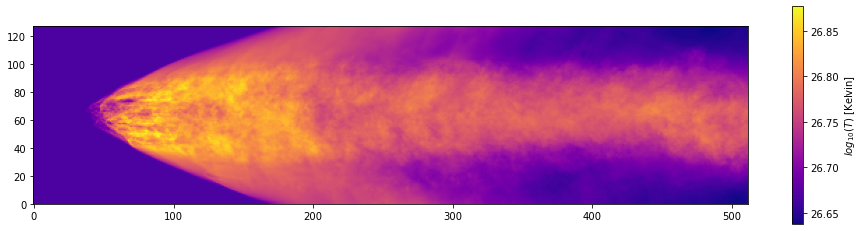

In [22]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(log_T_z.T, origin='lower', cmap='plasma')
cb = plt.colorbar(image, label='$log_{10}(T)$ [Kelvin]')

<h2>Density Weighted Projections</h2>

In [23]:
d_avg = np.average(d)

In [24]:
T_weighted = T*d/d_avg

In [34]:
T_x_weighted = np.sum(T_weighted, axis=0)*dx*l_c
T_y_weighted = np.sum(T_weighted, axis=1)*dx*l_c
T_z_weighted = np.sum(T_weighted, axis=2)*dx*l_c

In [35]:
print(np.min(T_x_weighted), np.max(T_x_weighted))

1.6284826290830418e+27 2.2068660991708424e+27


In [36]:
log_Tx_weighted = np.log10(T_x_weighted)
log_Ty_weighted = np.log10(T_y_weighted)
log_Tz_weighted = np.log10(T_z_weighted)

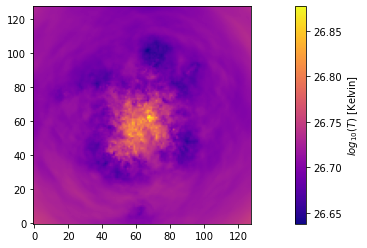

In [37]:
fig = plt.figure(figsize = (16,4))
plt.imshow(log_Tx_weighted.T, origin='lower', cmap='plasma')
cb = plt.colorbar(image, label='$log_{10}(T)$ [Kelvin]')

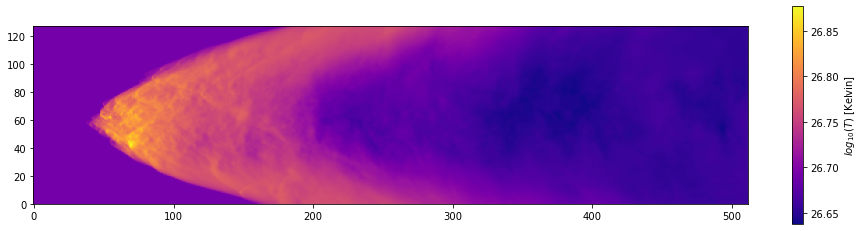

In [38]:
fig = plt.figure(figsize = (16,4))
plt.imshow(log_Ty_weighted.T, origin='lower', cmap='plasma')
cb = plt.colorbar(image, label='$log_{10}(T)$ [Kelvin]')

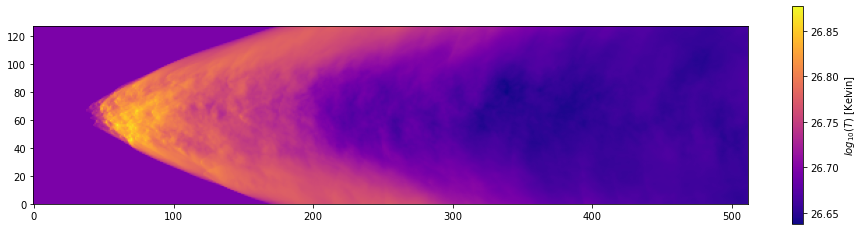

In [39]:
fig = plt.figure(figsize = (16,4))
plt.imshow(log_Tz_weighted.T, origin='lower', cmap='plasma')
cb = plt.colorbar(image, label='$log_{10}(T)$ [Kelvin]')